# Brain Weight Prediction


### Importing Libraries and dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd 
import os

In [2]:
dataset = pd.read_csv('./DataSets/Brain-weight-data.csv')
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Important insights about the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


### Obtaining the Correlation Matrix of the dataset 

In [4]:
dataset.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


We have decided to study the relationship between the Brain Weight and the Head Size

**Preparing the features and samples for training our Linear Regression Model**

In [5]:
x = dataset.iloc[:,2].values.reshape(-1,1)
x[:5]

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177]], dtype=int64)

In [6]:
y = dataset['Brain Weight(grams)']
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

**Training and Testing Dataset Spliting using the `train_test_split`**
  

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25)

In [8]:
y_train.head() , y_test.head()

(210    1070
 195    1076
 145    1380
 108    1360
 137    1165
 Name: Brain Weight(grams), dtype: int64,
 94     1290
 214    1250
 122    1440
 201    1235
 131    1335
 Name: Brain Weight(grams), dtype: int64)

### Simple Linear Regression

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1305.57738866, 1273.23266477, 1529.15319939, 1171.65888274,
       1257.91147977, 1218.47361468, 1384.73684449, 1408.56979893,
       1449.71001791, 1155.20279515, 1270.67913394, 1173.07751098,
       1313.23798116, 1307.56346819, 1389.27645486, 1316.35896329,
       1142.15141533, 1292.52600884, 1343.59662551, 1437.79354069,
       1359.4852618 , 1241.17166653, 1265.28834662, 1177.61712135,
       1257.34402847, 1510.71103226, 1183.00790866, 1183.29163431,
       1319.19621977, 1266.13952357, 1510.99475791, 1350.40604106,
       1185.5614395 , 1362.32251828, 1103.84845283, 1274.08384171,
       1289.68875236, 1379.91350847, 1218.75734033, 1447.44021272,
       1351.8246693 , 1388.70900356, 1308.41464514, 1247.41363079,
       1304.15876042, 1516.10181957, 1204.57105792, 1215.6363582 ,
       1535.96261494, 1209.67811959, 1359.76898745, 1343.02917421,
       1200.3151732 , 1164.56574153, 1207.4083144 , 1392.11371134,
       1148.10965394, 1153.78416691, 1249.68343597, 1151.23063

Obtaining the R^2 score of the model

In [10]:
model.score(x_test,y_test)

0.5195768852657999

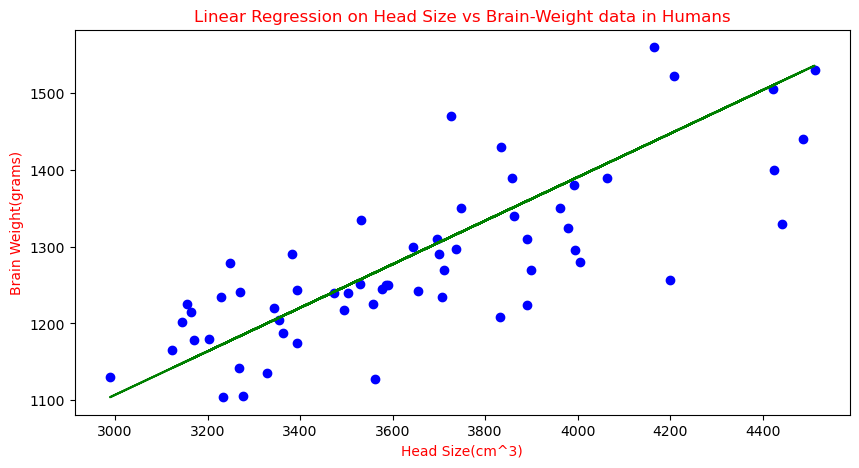

In [11]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Linear Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [13]:
y_pred = dtr.predict(x_test)
y_pred

array([1350., 1300., 1565., 1060., 1210., 1205., 1375., 1432., 1380.,
       1127., 1320., 1180., 1280., 1220., 1302., 1280., 1080., 1260.,
       1315., 1405., 1363., 1270., 1255., 1250., 1375., 1565., 1243.,
       1243., 1280., 1255., 1565., 1430., 1265., 1363., 1090., 1300.,
       1205., 1375., 1205., 1380., 1415., 1375., 1220., 1240., 1305.,
       1565., 1170., 1185., 1565., 1095., 1363., 1245., 1236., 1110.,
       1170., 1302., 1170., 1237., 1320., 1170.])

In [14]:
dtr.score(x_test,y_test)

0.28361401664981223

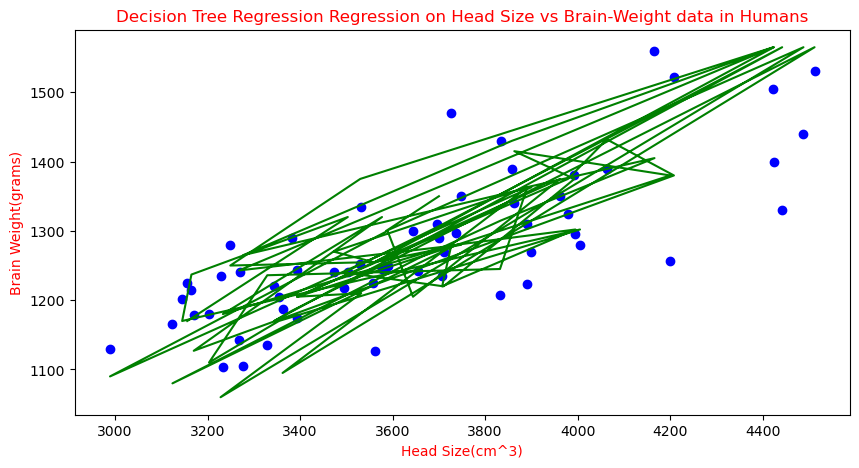

In [15]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Decision Tree Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Random Forest Regression 

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
y_pred = rfr.predict(x_test)
y_pred

array([1316.3       , 1301.7       , 1540.97      , 1090.83      ,
       1257.05      , 1192.07297619, 1365.51      , 1390.11166667,
       1443.7       , 1159.35      , 1303.625     , 1153.23      ,
       1293.7       , 1258.35      , 1336.31      , 1291.8       ,
       1177.45      , 1298.04      , 1295.86      , 1404.84      ,
       1361.385     , 1228.1725    , 1267.37      , 1225.91      ,
       1310.85      , 1540.97      , 1243.96      , 1243.96      ,
       1294.955     , 1259.715     , 1540.97      , 1422.39      ,
       1251.44      , 1362.11      , 1084.        , 1298.2       ,
       1269.21      , 1346.46      , 1192.07297619, 1442.55      ,
       1418.7       , 1365.51      , 1252.1       , 1268.52364286,
       1309.56      , 1540.97      , 1182.18      , 1163.915     ,
       1540.97      , 1124.68      , 1359.775     , 1265.11      ,
       1234.07366667, 1110.        , 1168.89      , 1353.38      ,
       1159.1       , 1185.6       , 1305.29      , 1159.1    

In [18]:
rfr.score(x_test,y_test)

0.39545438317198145

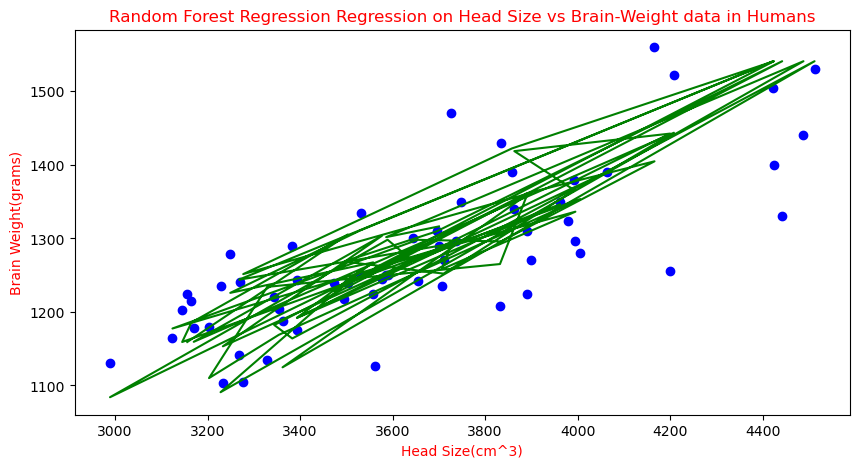

In [19]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Random Forest Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Lasso Regression

In [20]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [21]:
y_pred = lasso.predict(x_test)
y_pred

array([1305.57732979, 1273.23269498, 1529.15252475, 1171.65919271,
       1257.91155218, 1218.47379571, 1384.7365676 , 1408.5694564 ,
       1449.70956207, 1155.20315044, 1270.67917118, 1173.07781704,
       1313.23790119, 1307.56340386, 1389.27616546, 1316.35887472,
       1142.15180657, 1292.52598592, 1343.59646193, 1437.79311767,
       1359.48505446, 1241.17178505, 1265.28839872, 1177.61741491,
       1257.34410245, 1510.71040841, 1183.00818737, 1183.29191224,
       1319.19612339, 1266.13957332, 1510.99413328, 1350.40585873,
       1185.56171117, 1362.32230313, 1103.84894957, 1274.08386958,
       1289.68873725, 1379.91324486, 1218.75752058, 1447.43976314,
       1351.82448306, 1388.70871573, 1308.41457846, 1247.41373212,
       1304.15870546, 1516.10118088, 1204.57127724, 1215.63654704,
       1535.96192155, 1209.67832484, 1359.76877933, 1343.02901219,
       1200.31540424, 1164.56607104, 1207.40852591, 1392.11341413,
       1148.11002877, 1153.7845261 , 1249.68353105, 1151.23100

In [22]:
lasso.score(x_test,y_test)

0.5195784160936261

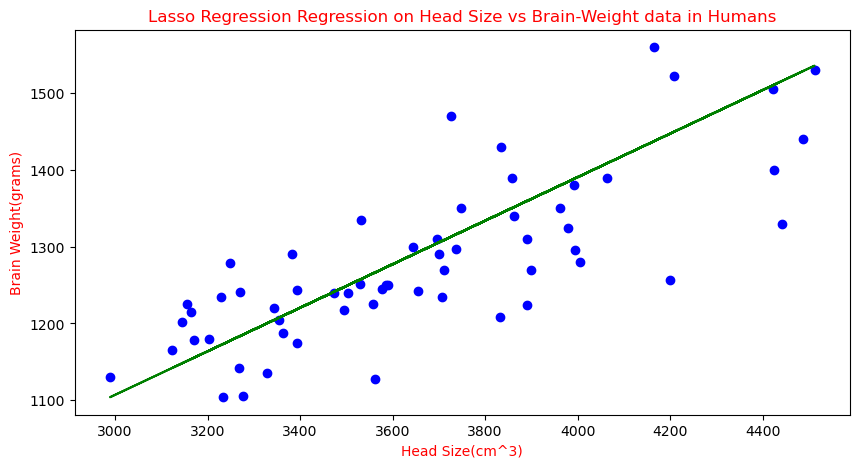

In [23]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Lasso Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [24]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [25]:
y_pred = ridge.predict(x_test)
y_pred

array([1305.57738856, 1273.23266482, 1529.1531983 , 1171.65888323,
       1257.91147989, 1218.47361497, 1384.73684404, 1408.56979838,
       1449.71001718, 1155.20279572, 1270.679134  , 1173.07751147,
       1313.23798103, 1307.56346809, 1389.27645439, 1316.35896314,
       1142.15141596, 1292.52600881, 1343.59662524, 1437.79354001,
       1359.48526147, 1241.17166672, 1265.28834671, 1177.61712182,
       1257.34402859, 1510.71103126, 1183.00790911, 1183.29163476,
       1319.19621961, 1266.13952365, 1510.9947569 , 1350.40604077,
       1185.56143993, 1362.32251794, 1103.84845363, 1274.08384176,
       1289.68875234, 1379.91350804, 1218.75734062, 1447.440212  ,
       1351.824669  , 1388.7090031 , 1308.41464503, 1247.41363095,
       1304.15876033, 1516.10181855, 1204.57105827, 1215.6363585 ,
       1535.96261383, 1209.67811992, 1359.76898712, 1343.02917395,
       1200.31517357, 1164.56574206, 1207.40831474, 1392.11371086,
       1148.10965454, 1153.78416748, 1249.68343613, 1151.23063

In [26]:
ridge.score(x_test,y_test)

0.5195768877196842

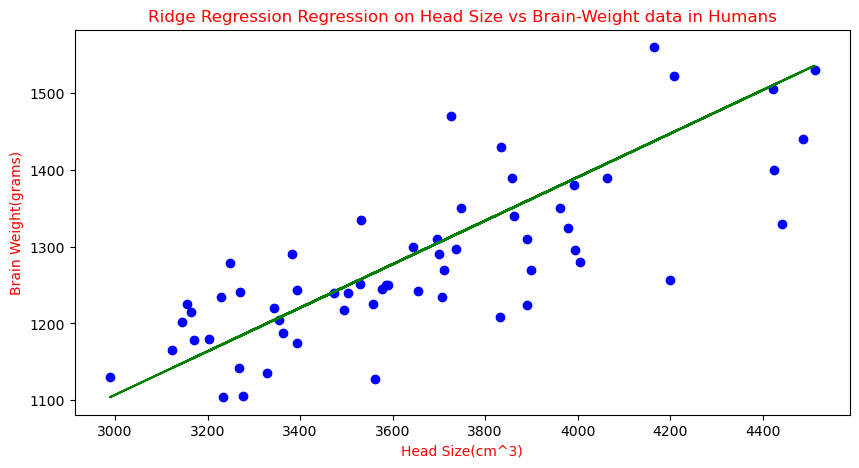

In [27]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Ridge Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### XgBoost Regressor 

In [28]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
y_pred = xgb.predict(x_test)
y_pred

array([1341.0974, 1298.6194, 1564.8416, 1068.9355, 1217.6855, 1202.3556,
       1366.3531, 1427.7725, 1384.2085, 1132.2302, 1311.47  , 1180.1255,
       1284.7543, 1231.1172, 1311.7308, 1284.9413, 1085.4303, 1268.9948,
       1315.199 , 1401.6138, 1363.2635, 1269.2145, 1256.1473, 1247.7148,
       1217.6855, 1564.8416, 1245.6221, 1245.6221, 1284.9413, 1256.1473,
       1564.8416, 1428.1328, 1256.8481, 1363.2635, 1093.0482, 1298.6194,
       1214.1151, 1366.3531, 1202.3556, 1384.2085, 1415.6428, 1366.3531,
       1297.2113, 1315.7516, 1304.2798, 1564.8416, 1173.3917, 1179.5397,
       1564.8416, 1102.1504, 1363.2635, 1246.0464, 1234.4193, 1111.0247,
       1173.3917, 1311.7308, 1166.7573, 1231.1451, 1313.6821, 1166.7573],
      dtype=float32)

In [30]:
xgb.score(x_test,y_test)

0.3177701014010542

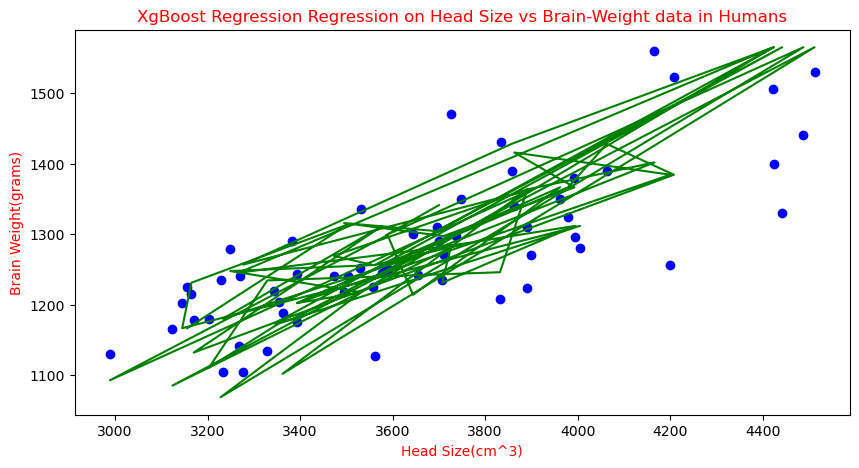

In [31]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("XgBoost Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [32]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train, y_train)

MLPRegressor()

In [33]:
y_pred = mlp.predict(x_test)
y_pred

array([1405.50164782, 1362.20577166, 1704.77489707, 1226.24152899,
       1341.69719875, 1288.9066129 , 1511.4626079 , 1543.36483244,
       1598.4341486 , 1204.21380252, 1358.78767618, 1228.14047093,
       1415.75593428, 1408.16016654, 1517.5392221 , 1419.93360654,
       1186.7435367 , 1388.03138201, 1456.39329173, 1582.48303634,
       1477.66144142, 1319.28968389, 1351.57169682, 1234.21708512,
       1340.93762197, 1680.08865189, 1241.43306448, 1241.81285287,
       1423.73149042, 1352.71106198, 1680.46844027, 1465.50821303,
       1244.85115997, 1481.4593253 , 1135.47210441, 1363.34513683,
       1384.23349813, 1505.00620531, 1289.28640129, 1595.39584151,
       1467.40715496, 1516.77964532, 1409.2995317 , 1327.64502841,
       1403.60270589, 1687.30463125, 1270.29698192, 1285.10872903,
       1713.88981836, 1277.1331729 , 1478.04122981, 1455.63371496,
       1264.60015611, 1216.7468193 , 1274.0948658 , 1521.33710597,
       1194.71909284, 1202.31486058, 1330.68333551, 1198.89676

In [34]:
mlp.score(x_test,y_test)

-0.895117812755414

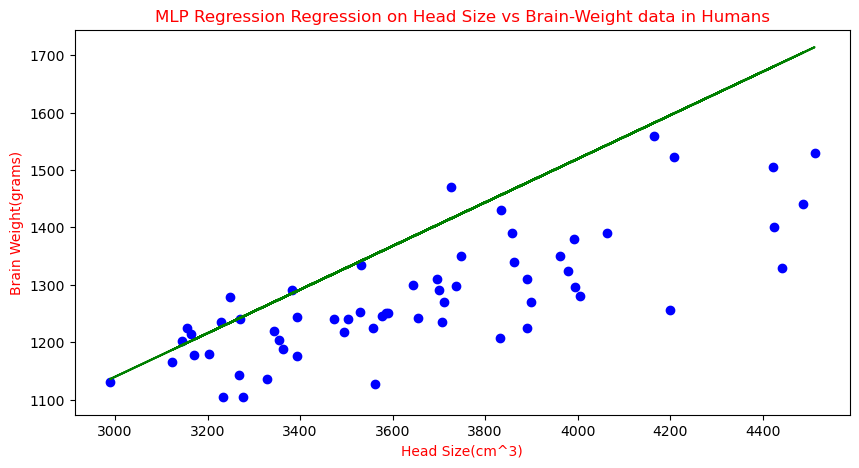

In [35]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("MLP Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Gradient Boosting Regressor 

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [37]:
y_pred = gb.predict(x_test)
y_pred

array([1305.59747165, 1290.27611915, 1560.28078089, 1106.37841297,
       1273.65039913, 1191.45801845, 1347.92750838, 1398.91583872,
       1409.3112948 , 1170.68229359, 1290.27611915, 1175.45119299,
       1303.7759534 , 1303.7759534 , 1341.02331713, 1305.65401801,
       1126.73263739, 1294.00267256, 1308.72821426, 1406.50240513,
       1369.05091892, 1259.45486911, 1287.55291719, 1225.08171271,
       1296.14663363, 1560.28078089, 1225.08171271, 1225.08171271,
       1305.65401801, 1287.55291719, 1560.28078089, 1412.23929195,
       1226.79171271, 1369.05091892, 1092.39823182, 1290.27611915,
       1289.78277732, 1347.92750838, 1191.45801845, 1409.3112948 ,
       1412.23929195, 1347.92750838, 1303.7759534 , 1245.75539894,
       1305.59747165, 1560.28078089, 1188.30328336, 1158.68696327,
       1560.28078089, 1138.36687736, 1369.05091892, 1264.32481684,
       1209.57906636, 1128.79678701, 1188.30328336, 1341.02331713,
       1151.69167686, 1170.68229359, 1290.92735676, 1151.69167

In [38]:
gb.score(x_test,y_test)

0.4001178333846367

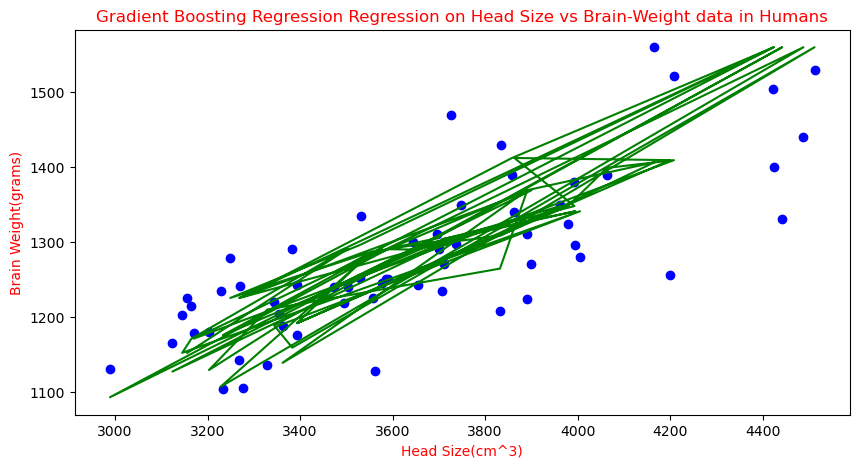

In [39]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Gradient Boosting Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Support Vector Machine Regressor 

In [40]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [41]:
y_pred = svm.predict(x_test)
y_pred

array([1296.77911993, 1283.63529855, 1295.98167023, 1250.7198661 ,
       1276.76891201, 1260.55174962, 1312.16406427, 1312.15150863,
       1308.60728854, 1250.45979024, 1282.50144341, 1250.81836064,
       1299.40353372, 1297.4811054 , 1312.30091035, 1300.40650084,
       1251.30466896, 1291.82223615, 1307.41737142, 1310.00847572,
       1310.04542253, 1269.39304898, 1280.08816561, 1251.21819685,
       1276.51390667, 1298.97308739, 1251.86241022, 1251.90144147,
       1301.28380321, 1280.47048874, 1298.92568354, 1308.67307104,
       1252.23216531, 1310.40529355, 1257.50665553, 1284.0114817 ,
       1290.67346969, 1311.94111238, 1260.64947782, 1308.89368132,
       1308.91002065, 1312.28758771, 1297.77740931, 1272.09498409,
       1296.26875879, 1298.07815073, 1256.26937145, 1259.59590693,
       1294.94142587, 1257.72201956, 1310.0828662 , 1307.30381451,
       1255.17355587, 1250.41247246, 1257.05830196, 1312.35162715,
       1250.81410202, 1250.5095855 , 1273.09491865, 1250.62611

In [42]:
svm.score(x_test,y_test)

0.2435161699867674

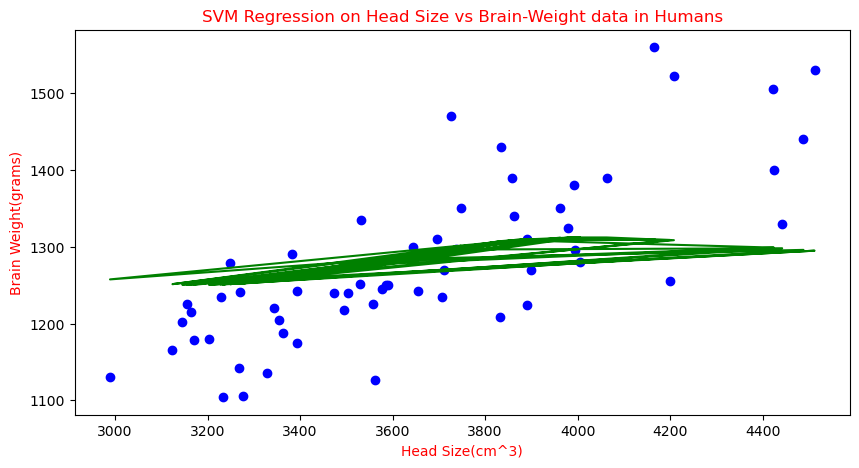

In [43]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("SVM Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

***************************************************
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.49|
|Decision Tree Regressor|0.29|
|Random Forest Regressor|0.39|
|Lasso Regression|0.49|
|Ridge Regression|0.49|
|XgBoost Regressor|0.45|
|MLP Regressor|0.32|
|Gradient Boosting Regressor|0.44|
|Support Vector Regressor|0.23|

### Conclusion


Best Fitted Models ranking - 
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. XgBoost Regression
5. Gradient Boosting Regression
6. Random Forest Regression
7. MLP Regressor
8. Decision Tree Regression
9. Support Vector Machine Regression

